<IPython.core.display.Javascript object>


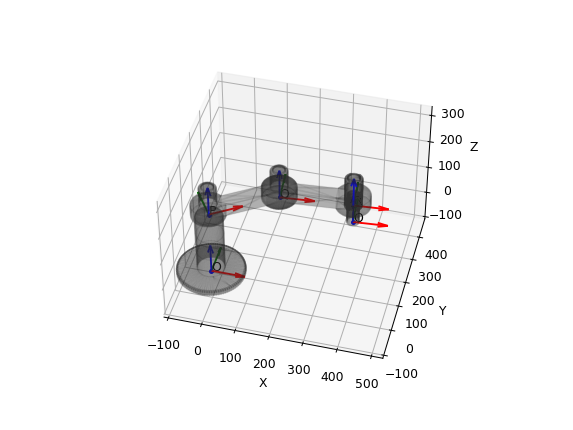

In [1]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols,init_printing
from sympy.algebras.quaternion import Quaternion
import numpy as np
import sys 
sys.path.append("../tools")
from vis import Visualizer
%matplotlib notebook
init_printing() # Para visualizar simbolos

# Definicion del modelo para el ejemplo del robot scara

# Parametros del modelo
l1,l2,l3=symbols('l1,l2,l3')
# Variables de movimiento
q1,q2,q3=dynamicsymbols('q1,q2,q3')

# Defina los marcos y puntos de interes en el robot
a=ReferenceFrame('A')
o=Point('O')
b=a.orientnew('B','Axis',(q1,a.z))
p=o.locatenew('P',l1*a.z)
c=b.orientnew('C','Axis',(q2,b.z))
q=p.locatenew('Q',l2*b.x)
r=q.locatenew('R',l3*c.x)
s=r.locatenew('Q',-q3*c.z)

# Construya un objecto de visualizacion con el marco de referencia inercial y punto de origen
vis=Visualizer(a,o)
# Agrege marcos y puntos para ser visualizados (marco,punto,geometria)
vis.add(a,o,shape='assets/scara_base.stl')
vis.add(b,p,shape='assets/scara_brazo.stl')
vis.add(c,q,shape='assets/scara_brazo.stl')
vis.add(c,r,shape='assets/scara_cilindro.stl')
vis.add(c,s,shape='assets/Scara_effector.stl')

#vis.add(b,o,shape='assets/Atraccion_Parque_link1.stl')
#vis.add(c,p,shape='assets/Atraccion_Parque_disk.stl')
vis.add(a,o,frame_scale=100)
vis.add(b,p,frame_scale=100)
vis.add(c,q,frame_scale=100)
vis.add(c,r,frame_scale=100)
vis.add(c,s,frame_scale=100)


# Modifique las variables de movimiento y verifique el cambio en la posicion y
# orientacion de los marcos
vis.plot({l1:220,l2:210,l3:210,q1:0,q2:0,q3:100})

In [2]:
#Modifique las variables de movimiento para cambiar la configuracion cinematica del modelo
#Puede hacerlo desde esta celda para actualizar el modelo sin tener que volver a generar la figura.
vis.plot({l1:220,l2:210,l3:210,q1:-0.2,q2:0.5,q3:90})

In [6]:
#Esto permite crear animaciones facilmente
#Ejecute esta celda y de click en la figura 1 para observar la animacion del movimiento.
import matplotlib
from matplotlib.animation import FuncAnimation
tt=np.linspace(0,10,250)
qq1=np.sin(2*np.pi*0.1*tt)
qq2=np.sin(2*np.pi*0.23*tt)
qq3=50+50*np.sin(np.pi*0.23*tt)

def animfunc(i,qq1,qq2,qq3):
    print(i)
    vis.plot({l1:220,l2:210,l3:210,q1:qq1[i],q2:qq2[i],q3:qq3[i]})    

anim=FuncAnimation(vis.fig,animfunc,fargs=(qq1,qq2,qq3),interval=10)


In [7]:
#Exporte la animacion como gif
anim.save('animation.gif', fps=16)

MovieWriter imagemagick unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
